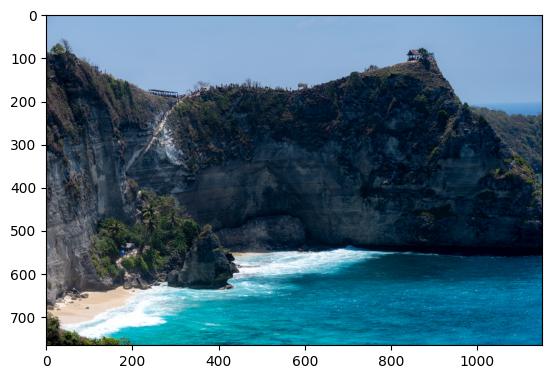

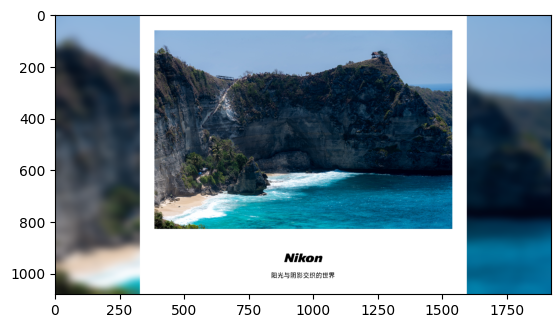

In [47]:

from matplotlib import pyplot as plt
import cv2
import numpy as np
parent="D:/1_pywk/FrameApp/"

def add_frame_and_blur_background_opencv(image_path, output_path,logo_path=parent+"logos/Nikon Logo.png",screen=(1920,1080)):
    # Load the image
    original_image = cv2.imread(image_path)
    
    # Calculate the aspect ratio
    aspect_ratio = original_image.shape[1] / original_image.shape[0]
    
    # Determine the new size maintaining the aspect ratio within a 16:9 frame
    if aspect_ratio > 1:  # Landscape
        new_height = int(screen[1] * 0.71)
    else:  # Portrait or square
        new_height = int(screen[1] * 0.8)
    new_width = int(new_height * aspect_ratio)
    
    # Resize the image to the new size
    resized_image = cv2.resize(original_image, (new_width, new_height), interpolation=cv2.INTER_LANCZOS4)
    
    plt.figure(1)
    plt.imshow(resized_image[...,::-1])
    plt.show()
    
    # Create a new image with a white background and 16:9 aspect ratio
    new_image = np.full((int(screen[1]), int(screen[1] * 1.17), 3), 255, dtype=np.uint8)
    
    # Calculate positioning to center the image
    x = (new_image.shape[1] - new_width) // 2
    y = new_image.shape[0] // 17
    
    # Paste the resized image onto the center of the background
    new_image[y:y+new_height, x:x+new_width] = resized_image
    
    # Load and resize the logo
    logo = cv2.imread(logo_path, cv2.IMREAD_COLOR)
    rto_logo = logo.shape[1] / logo.shape[0]
    logo_height = screen[1] // 10
    logo_width = int(logo_height * rto_logo)
    logo = cv2.resize(logo, (logo_width, logo_height), interpolation=cv2.INTER_AREA)
    
    logo[cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)>128]=(255,255,255)
    logo[cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)<=128]=(0,0,0)
    
    # Paste the logo onto the image
    lx = (new_image.shape[1] - logo_width) // 2
    ly = int(8.5 * new_image.shape[0] // 10)
    
    new_image[ly:ly+logo_height, lx:lx+logo_width]=logo

    # Create a blurred background image from the original
    blur_radius = 50
    blurred_background = cv2.GaussianBlur(original_image, (0, 0), blur_radius)
    blurred_background = cv2.resize(blurred_background, (screen[0], screen[1]), interpolation=cv2.INTER_AREA)
    
    # Calculate the position to paste the original image on the blurred background
    left = (blurred_background.shape[1] - new_image.shape[1]) // 2
    top = (blurred_background.shape[0] - new_image.shape[0]) // 2
    
    # Paste the original image on the blurred background
    blurred_background[top:top+new_image.shape[0], left:left+new_image.shape[1]] = new_image
    
    # Save the result
    cv2.imwrite(output_path, blurred_background)
    
    plt.figure(2)
    plt.imshow(blurred_background[...,::-1])
    plt.show()

# The path to the original image and the output path
original_image_path = r'D:\1_pywk\_DSC2375.jpg'
output_image_path = r'D:\1_pywk\new__DSC2375.jpg'

# Call the function to add the frame and blur the background
add_frame_and_blur_background_opencv(original_image_path, output_image_path)
